# FIFA 20 PLAYER PREDICTOR

#### CREATING A MACHINE LEARNING MODEL THAT ACCURATELY PREDICTS FIFA 20 PLAYER'S RATINGS AND ANOTHER MODEL THAT PREDICTS FIFA 20 PLAYERS' RATINGS USING FIFA 19 PLAYERS' DATASET

## ETL & DATA CLEANING

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='players_20.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [2]:
df_fifa = df_data_1

In [3]:
df_fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [4]:
df_fifa1 = df_fifa[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [5]:
df_fifa1.shape

(18278, 6)

In [6]:
df_fifa1['value_eur'] = df_fifa1['value_eur']/1000000
df_fifa1['wage_eur'] = df_fifa1['wage_eur']/10000

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
df_fifa1.head()

,short_name,age,overall,potential,value_eur,wage_eur
0,L. Messi,32,94,94,95.5,56.5
1,Cristiano Ronaldo,34,93,93,58.5,40.5
2,Neymar Jr,27,92,92,105.5,29.0
3,J. Oblak,26,91,93,77.5,12.5
4,E. Hazard,28,91,91,90.0,47.0


In [8]:
df_fifa1.corr()

,age,overall,potential,value_eur,wage_eur
age,1.000000,0.464305,-0.262872,0.081513,0.151031
overall,0.464305,1.000000,0.646650,0.638230,0.573578
potential,-0.262872,0.646650,1.000000,0.580868,0.475490
value_eur,0.081513,0.638230,0.580868,1.000000,0.858052
wage_eur,0.151031,0.573578,0.475490,0.858052,1.000000


In [9]:
df_fifa1.describe()

,age,overall,potential,value_eur,wage_eur
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,66.244994,71.546887,2.484038,0.945694
std,4.656964,6.949953,6.139669,5.585481,2.135171
min,16.000000,48.000000,49.000000,0.000000,0.000000
25%,22.000000,62.000000,67.000000,0.325000,0.100000
50%,25.000000,66.000000,71.000000,0.700000,0.300000
75%,29.000000,71.000000,75.000000,2.100000,0.800000
max,42.000000,94.000000,95.000000,105.500000,56.500000


## DATA EXPLORATION

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

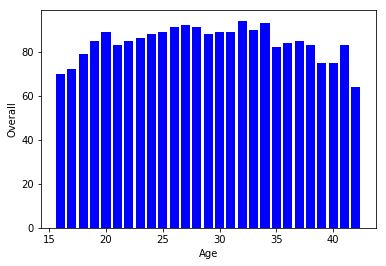

In [12]:
plt.bar('age', 'overall', data = df_fifa1, color = 'blue')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [13]:
line1 = linear_model.LinearRegression() 

In [14]:
df_Potential = df_fifa.loc[:, "potential"].values.reshape(-1, 1) 
df_Overall = df_fifa.loc[:, "overall"].values.reshape(-1, 1) 

In [15]:
line1.fit(df_Potential, df_Overall) 
pred1 = line1.predict(df_Potential)

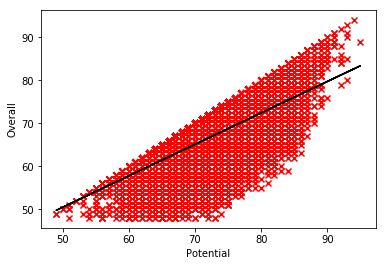

In [16]:
plt.scatter('potential', 'overall', data = df_fifa, marker = 'x', color = 'red')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.plot(df_Potential,pred1, color='black')
plt.show()

## ML MODELLING

In [17]:
import numpy as np
split = np.random.rand(len(df_fifa1)) < 0.875
train = df_fifa1[split]
test = df_fifa1[~split]

In [18]:
regr = linear_model.LinearRegression()

In [19]:
## Trainig & fitting the model
fifa_x_train = train[['age','value_eur','potential','wage_eur']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
## Testing the model
fifa_x_test = test[['age','value_eur','potential', 'wage_eur']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [21]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [22]:
r2_score(fifa_y_test, df_fifa_pred)

0.9764455437896136

In [23]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test, df_fifa_pred)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  

Pearson Correlation Coefficient:  [0.98819713] and a P-value of: [0.]


In [24]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
df_fifa2 = pd.merge(df_fifa1,fifa_x_test)
df_fifa2.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,H. Kane,25,89,91,83.0,22.0,89.582439
1,G. Chiellini,34,89,89,24.5,21.5,86.492515
2,C. Eriksen,27,88,89,68.0,20.5,88.346448
3,A. Laporte,25,87,90,56.5,19.5,85.110533
4,S. Umtiti,25,86,89,50.0,21.0,85.445749
5,G. Donnarumma,20,85,92,41.5,3.4,85.080679
6,Fabinho,25,85,89,45.0,12.5,85.411095
7,R. Bürki,28,85,86,32.0,9.2,86.672326
8,A. Witsel,30,85,85,31.5,11.0,86.970136
9,João Cancelo,25,84,89,36.5,15.0,85.838850


In [26]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
df_fifa3 = pd.merge(df_fifa1,fifa_x_train)
df_fifa3.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,L. Messi,32,94,94,95.5,56.5,93.589150
1,Cristiano Ronaldo,34,93,93,58.5,40.5,93.268431
2,Neymar Jr,27,92,92,105.5,29.0,91.004560
3,J. Oblak,26,91,93,77.5,12.5,98.989276
4,E. Hazard,28,91,91,90.0,47.0,91.355363
5,K. De Bruyne,28,91,91,90.0,37.0,94.637641
6,M. ter Stegen,27,90,93,67.5,25.0,89.827210
7,V. van Dijk,27,90,91,78.0,20.0,87.890444
8,L. Modrić,33,90,90,45.0,34.0,91.320136
9,M. Salah,27,90,90,80.5,24.0,89.436665


## USING FIFA 19 ratings to predict FIFA 20 ratings

In [28]:


body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='players_19.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [29]:
df_fifa4 = df_data_2[['short_name','age','overall','potential', 'value_eur', 'wage_eur']]

In [30]:
df_fifa4['value_eur'] = df_fifa4['value_eur']/1000000
df_fifa4['wage_eur'] = df_fifa4['wage_eur']/10000

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
df_fifa4.head()

,short_name,age,overall,potential,value_eur,wage_eur
0,Cristiano Ronaldo,33,94,94,77.0,40.5
1,L. Messi,31,94,94,110.5,56.5
2,Neymar Jr,26,92,93,118.5,29.0
3,De Gea,27,91,93,72.0,26.0
4,K. De Bruyne,27,91,92,102.0,35.5


In [32]:
df_fifa4.shape

(17770, 6)

In [33]:
df_fifa4.corr()

,age,overall,potential,value_eur,wage_eur
age,1.000000,0.463201,-0.237430,0.082805,0.146146
overall,0.463201,1.000000,0.665131,0.626512,0.574718
potential,-0.237430,0.665131,1.000000,0.576133,0.491614
value_eur,0.082805,0.626512,0.576133,1.000000,0.861424
wage_eur,0.146146,0.574718,0.491614,0.861424,1.000000


## ML MODELLING

In [34]:
import numpy as np
split = np.random.rand(len(df_fifa4)) < 0.75
train2 = df_fifa4[split]
test2 = df_fifa4[~split]

In [35]:
regr2 = linear_model.LinearRegression()

In [36]:
## Trainig & fitting the model
fifa_x_train2 = train2[['age','value_eur','potential','wage_eur']]
fifa_y_train2 = train2[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly2 = poly.fit_transform(fifa_x_train2)
regr2.fit(fifa_x_train_poly2, fifa_y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
## Testing the model
fifa_x_test2 = test2[['age','value_eur','potential','wage_eur']]
fifa_y_test2 = test2[['overall']]
fifa_x_test_poly2 = poly.fit_transform(fifa_x_test2)

In [38]:
df_fifa_pred2 = regr2.predict(fifa_x_test_poly2)

In [39]:
r2_score(fifa_y_test2, df_fifa_pred2)

0.9731366660125368

In [40]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fifa_y_test2, df_fifa_pred2)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  

Pearson Correlation Coefficient:  [0.98647796] and a P-value of: [0.]


In [41]:
fifa_x_test2['Predicted Ratings'] = df_fifa_pred2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
df_fifa5 = pd.merge(df_fifa4,fifa_x_test2)
df_fifa5.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,De Gea,27,91,93,72.0,26.0,104.823610
1,L. Suárez,31,91,91,80.0,45.5,87.794408
2,T. Courtois,26,90,91,62.0,25.0,89.244549
3,D. Godín,32,90,90,44.0,12.5,81.065771
4,R. Lewandowski,29,90,90,77.0,20.5,92.394842
5,David Silva,32,89,89,51.5,27.5,85.777055
6,E. Cavani,31,89,89,60.0,20.0,87.784338
7,C. Eriksen,26,88,91,73.5,20.5,90.197455
8,G. Buffon,40,88,88,4.0,7.7,69.513093
9,Marcelo,30,88,88,43.0,28.5,89.662909


In [43]:
df_fifa_pred3 = regr2.predict(fifa_x_train_poly2)

In [44]:
fifa_x_train2['Predicted Ratings'] = df_fifa_pred3

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
df_fifa6 = pd.merge(df_fifa4,fifa_x_train2)
df_fifa6.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,Predicted Ratings
0,Cristiano Ronaldo,33,94,94,77.0,40.5,94.091213
1,L. Messi,31,94,94,110.5,56.5,94.531710
2,Neymar Jr,26,92,93,118.5,29.0,92.064930
3,K. De Bruyne,27,91,92,102.0,35.5,90.653590
4,Sergio Ramos,32,91,91,51.0,38.0,92.956420
5,L. Modrić,32,91,91,67.0,42.0,88.743441
6,E. Hazard,27,91,91,93.0,34.0,90.298175
7,J. Oblak,25,90,93,68.0,9.4,89.975919
8,M. Neuer,32,90,90,44.0,13.5,81.954132
9,T. Kroos,28,90,90,76.5,35.5,88.734936


In [46]:
df_fifa7 = df_fifa1[['age','value_eur','potential','wage_eur']]
df_fifa8 = poly.fit_transform(df_fifa7)

In [47]:
df_fifa_pred4 = regr2.predict(df_fifa8)

In [48]:
df_fifa7['FIFA 20 Predicted Ratings'] = df_fifa_pred4

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
df_fifa7.head()

,age,value_eur,potential,wage_eur,FIFA 20 Predicted Ratings
0,32,95.5,94,56.5,92.140874
1,34,58.5,93,40.5,65.765201
2,27,105.5,92,29.0,96.949381
3,26,77.5,93,12.5,91.651996
4,28,90.0,91,47.0,74.188009


In [50]:
df_fifa9 = pd.merge(df_fifa1,df_fifa7)

In [51]:
df_fifa9.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,FIFA 20 Predicted Ratings
0,L. Messi,32,94,94,95.5,56.5,92.140874
1,Cristiano Ronaldo,34,93,93,58.5,40.5,65.765201
2,Neymar Jr,27,92,92,105.5,29.0,96.949381
3,J. Oblak,26,91,93,77.5,12.5,91.651996
4,E. Hazard,28,91,91,90.0,47.0,74.188009
5,K. De Bruyne,28,91,91,90.0,37.0,91.704902
6,M. ter Stegen,27,90,93,67.5,25.0,104.313836
7,V. van Dijk,27,90,91,78.0,20.0,92.890758
8,L. Modrić,33,90,90,45.0,34.0,85.283936
9,M. Salah,27,90,90,80.5,24.0,92.231913


In [52]:
## The predicted top 20 rated FIFA 20 footballers
df_fifa9 = df_fifa9.sort_values('FIFA 20 Predicted Ratings', ascending = False).reset_index()
df_fifa9.drop("index", axis = 1, inplace = True)
df_fifa9.head(20)

,short_name,age,overall,potential,value_eur,wage_eur,FIFA 20 Predicted Ratings
0,M. ter Stegen,27,90,93,67.5,25.0,104.313836
1,Neymar Jr,27,92,92,105.5,29.0,96.949381
2,Sergio Ramos,33,89,89,31.5,30.0,93.889536
3,K. Koulibaly,28,89,91,67.5,15.0,93.200596
4,De Gea,28,89,90,56.0,20.5,92.969448
5,V. van Dijk,27,90,91,78.0,20.0,92.890758
6,N. Kanté,28,89,90,66.0,23.5,92.535526
7,M. Salah,27,90,90,80.5,24.0,92.231913
8,L. Messi,32,94,94,95.5,56.5,92.140874
9,K. De Bruyne,28,91,91,90.0,37.0,91.704902


In [53]:
r2_score(df_fifa9['overall'], df_fifa9['FIFA 20 Predicted Ratings'])

0.974274145931622

In [54]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df_fifa9['overall'], df_fifa9['FIFA 20 Predicted Ratings'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)  

Pearson Correlation Coefficient:  0.987730796612839 and a P-value of: 0.0
